In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_data=pd.read_csv('bank-full.csv')

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [7]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Looking at the above data, 
<ol>
    
    1) For balance the stadard deviation is 3044 which is a very high with min value in negative and Max value is 102127.0 but the mean is 1362,27. Value of 72 lies within 25% and 75% has a value of 1428. This indicates that there is a high possiblity of presence of outlier
    2) For Duration, the std is 257.52 which is very highvalue with the mean as 258 and the Mac as 4198 woth 391.0 lies in 75% range. This is again a clear indication of Outliers present in duration column
    3) For pdays the std os 100.13 again a quite high value with min as -1.0 which lies within 75% as well. The Max value is 871.0. This is also a good indicator that there would be outliers in pdays column as well.

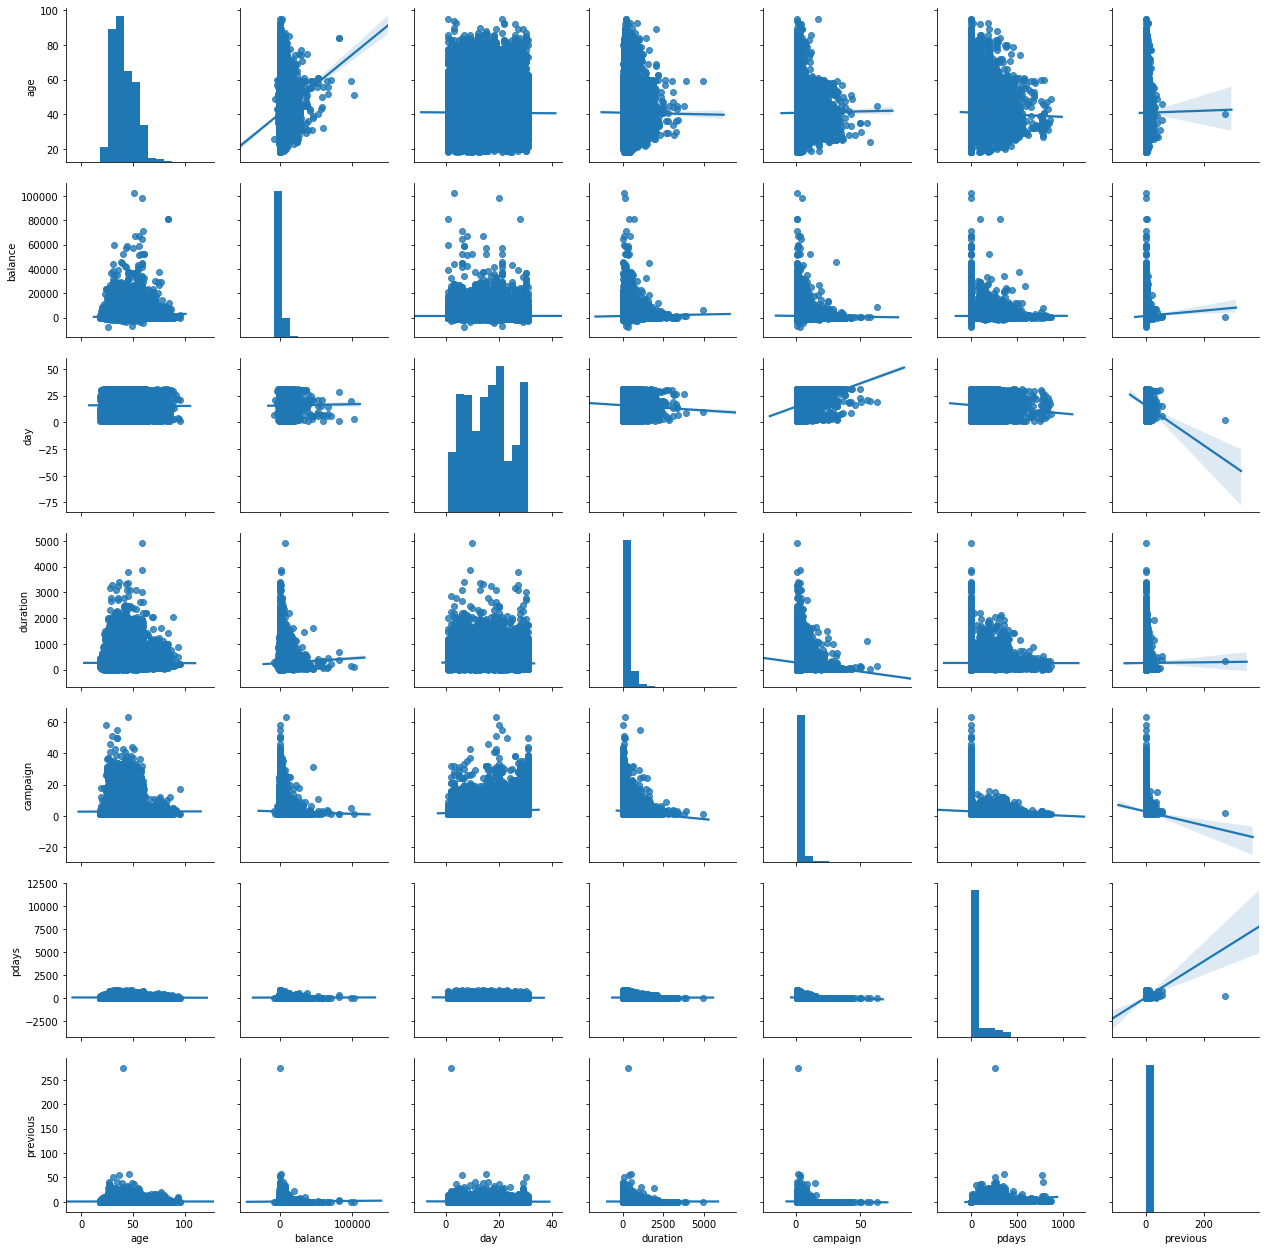

In [7]:
sns.pairplot(bank_data,hue=None,kind='reg')

###### For the above plot
<ol>

    1) For Balance, there are above around 60,000 which can be considered as outliers. We can drop them to proceed.
    2) For duration, there is a outlier above value 4000.
    3) For campaign, the value above 60 can also be considered as outlier and dropped
    4) For pdays, there are no visible outliers as expected. Looks like all there values are required for processing
    5) For pervious, the data with value 275 can be considered as outlier and can be dropped.

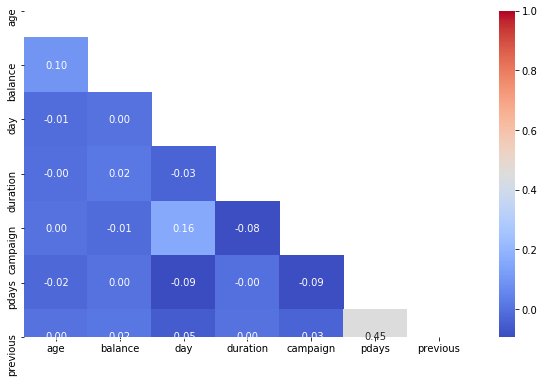

In [8]:
bank_corr=bank_data.corr()
plt.figure(figsize=(10,6))
mask = np.zeros_like(bank_corr)
mask[np.triu_indices_from(mask)] = True
a = sns.heatmap(bank_corr,mask=mask,annot=True,cmap='coolwarm',fmt='.2f')

There are no correlation between the data

##### Dropping the outliers

In [9]:
bank_data.drop(bank_data[bank_data['balance']> 60000].index,inplace=True)
bank_data.drop(bank_data[bank_data['duration']> 4000].index,inplace=True)
bank_data.drop(bank_data[bank_data['campaign']> 60].index,inplace=True)
bank_data.drop(bank_data[bank_data['previous']>= 275].index,inplace=True)

##### Converting all Objects types to Categorical type

In [10]:
for feature in bank_data.columns: 
    if bank_data[feature].dtype == 'object': 
        bank_data[feature] = pd.Categorical(bank_data[feature])
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45200 entries, 0 to 45210
Data columns (total 17 columns):
age          45200 non-null int64
job          45200 non-null category
marital      45200 non-null category
education    45200 non-null category
default      45200 non-null category
balance      45200 non-null int64
housing      45200 non-null category
loan         45200 non-null category
contact      45200 non-null category
day          45200 non-null int64
month        45200 non-null category
duration     45200 non-null int64
campaign     45200 non-null int64
pdays        45200 non-null int64
previous     45200 non-null int64
poutcome     45200 non-null category
Target       45200 non-null category
dtypes: category(10), int64(7)
memory usage: 3.2 MB


In [11]:
print(bank_data.job.value_counts())
print(bank_data.marital.value_counts())
print(bank_data.education.value_counts())
print(bank_data.default.value_counts())
print(bank_data.housing.value_counts())
print(bank_data.loan.value_counts())
print(bank_data.contact.value_counts())
print(bank_data.month.value_counts())
print(bank_data.poutcome.value_counts())
print(bank_data.Target.value_counts())

blue-collar      9731
management       9453
technician       7596
admin.           5170
services         4154
retired          2261
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27205
single      12789
divorced     5206
Name: marital, dtype: int64
secondary    23200
tertiary     13296
primary       6849
unknown       1855
Name: education, dtype: int64
no     44385
yes      815
Name: default, dtype: int64
yes    25127
no     20073
Name: housing, dtype: int64
no     37956
yes     7244
Name: loan, dtype: int64
cellular     29279
unknown      13019
telephone     2902
Name: contact, dtype: int64
may    13765
jul     6895
aug     6244
jun     5340
nov     3968
apr     2931
feb     2648
jan     1403
oct      737
sep      579
mar      477
dec      213
Name: month, dtype: int64
unknown    36951
failure     4901
other       1838
success     1510
Name: poutcome, dtype: int64
n

##### Converting all the data to a categorical data value

In [12]:
replaceStruct = {
                 "job":     {"blue-collar": 1, "management": 2 ,"technician": 3 ,"admin.": 4,"services": 5,"retired": 6,
                             "self-employed": 7,"entrepreneur": 8, "unemployed": 9,"housemaid": 10 ,
                             "student": 11,"unknown":-1},
                "default":  {"yes": 1, "no": 0 },
                "housing":  {"no": 0, "yes": 1 },
                "loan":     {"yes": 1, "no": 2},
                "month":    {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, 
                            "oct": 10, "nov": 11, "dec": 12, },
                "poutcome": {"success": 2, "other": 1, "failure": 0, "unknown": -1 },
                "Target"  : {"yes": 1, "no": 0 }
                    }
oneHotCols=["marital","education","contact"]

In [13]:
bank_data=bank_data.replace(replaceStruct)
bank_data=pd.get_dummies(bank_data, columns=oneHotCols)
bank_data.head(10)

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,2,0,2143,1,2,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,3,0,29,1,2,5,5,151,1,...,0,0,1,0,1,0,0,0,0,1
2,33,8,0,2,1,1,5,5,76,1,...,0,1,0,0,1,0,0,0,0,1
3,47,1,0,1506,1,2,5,5,92,1,...,0,1,0,0,0,0,1,0,0,1
4,33,-1,0,1,0,2,5,5,198,1,...,0,0,1,0,0,0,1,0,0,1
5,35,2,0,231,1,2,5,5,139,1,...,0,1,0,0,0,1,0,0,0,1
6,28,2,0,447,1,1,5,5,217,1,...,0,0,1,0,0,1,0,0,0,1
7,42,8,1,2,1,2,5,5,380,1,...,1,0,0,0,0,1,0,0,0,1
8,58,6,0,121,1,2,5,5,50,1,...,0,1,0,1,0,0,0,0,0,1
9,43,3,0,593,1,2,5,5,55,1,...,0,0,1,0,1,0,0,0,0,1


In [14]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45200 entries, 0 to 45210
Data columns (total 24 columns):
age                    45200 non-null int64
job                    45200 non-null int64
default                45200 non-null int64
balance                45200 non-null int64
housing                45200 non-null int64
loan                   45200 non-null int64
day                    45200 non-null int64
month                  45200 non-null int64
duration               45200 non-null int64
campaign               45200 non-null int64
pdays                  45200 non-null int64
previous               45200 non-null int64
poutcome               45200 non-null int64
Target                 45200 non-null int64
marital_divorced       45200 non-null uint8
marital_married        45200 non-null uint8
marital_single         45200 non-null uint8
education_primary      45200 non-null uint8
education_secondary    45200 non-null uint8
education_tertiary     45200 non-null uint8
education_u

### Split the data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
X = bank_data.drop("Target", axis=1)
y = bank_data.pop("Target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
PL_LR_model= LogisticRegression(solver='liblinear')
PL_LR_model.fit(X_train,y_train)
PL_LR_model_pred= PL_LR_model.predict(X_test)
PL_LR_model_score=PL_LR_model.score(X_test,y_test)
print(PL_LR_model_score)
LR_cm=metrics.confusion_matrix(y_test,PL_LR_model_pred,labels=[1,0])
print(LR_cm)
LR_cr=metrics.classification_report(y_test,PL_LR_model_pred,labels=[1,0])
print('Logistic regression model Classification Report')
print(LR_cr)

0.9002949852507375
[[  455  1094]
 [  258 11753]]
Logistic regression model Classification Report
              precision    recall  f1-score   support

           1       0.64      0.29      0.40      1549
           0       0.91      0.98      0.95     12011

    accuracy                           0.90     13560
   macro avg       0.78      0.64      0.67     13560
weighted avg       0.88      0.90      0.88     13560



### Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
PL_NB_model=GaussianNB()
PL_NB_model.fit(X_train,y_train)
PL_NB_model_pred= PL_NB_model.predict(X_test)
PL_NB_model_score=PL_NB_model.score(X_test,y_test)
print(PL_NB_model_score)
print(metrics.confusion_matrix(y_test,PL_NB_model_pred,labels=[1,0]))
print(metrics.classification_report(y_test,PL_NB_model_pred,labels=[1,0]))

0.8421828908554573
[[  838   711]
 [ 1429 10582]]
              precision    recall  f1-score   support

           1       0.37      0.54      0.44      1549
           0       0.94      0.88      0.91     12011

    accuracy                           0.84     13560
   macro avg       0.65      0.71      0.67     13560
weighted avg       0.87      0.84      0.85     13560



### KNN model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
PL_KNN_T=KNeighborsClassifier(n_neighbors=5,weights='distance')
PL_KNN_T.fit(X_train,y_train)
PL_KNN_T_pred= PL_KNN_T.predict(X_test)
PL_KNN_T_score=PL_KNN_T.score(X_test,y_test)
print(PL_KNN_T_score)
print(metrics.confusion_matrix(y_test,PL_KNN_T_pred,labels=[1,0]))

0.8827433628318584
[[  428  1121]
 [  469 11542]]


#### Choosing correct K value

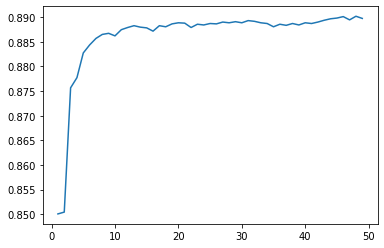

In [19]:
KNN_score = []
for i in range (1,50):
    PL_KNN = KNeighborsClassifier(n_neighbors=i,weights='distance')
    PL_KNN.fit(X_train,y_train)
    KNN_score.append(PL_KNN.score(X_test,y_test))
plt.plot(range(1,50),KNN_score)    

In [20]:
for i in range (1,49):
    if KNN_score[i] > 0.889:
        print(i,KNN_score[i])

26 0.8890117994100295
28 0.8890855457227138
30 0.889306784660767
31 0.8891592920353982
41 0.8890117994100295
42 0.8893805309734514
43 0.8896755162241888
44 0.8898230088495576
45 0.890117994100295
46 0.8894542772861357
47 0.8901917404129793
48 0.8897492625368731


Choosing the K value to be 30

In [21]:
from sklearn.neighbors import KNeighborsClassifier
PL_KNN_model=KNeighborsClassifier(n_neighbors=30,weights='distance')
PL_KNN_model.fit(X_train,y_train)
PL_KNN_model_pred= PL_KNN_model.predict(X_test)
print(metrics.confusion_matrix(y_test,PL_KNN_model_pred,labels=[1,0]))
print(metrics.classification_report(y_test,PL_KNN_model_pred,labels=[1,0]))

[[  297  1252]
 [  255 11756]]
              precision    recall  f1-score   support

           1       0.54      0.19      0.28      1549
           0       0.90      0.98      0.94     12011

    accuracy                           0.89     13560
   macro avg       0.72      0.59      0.61     13560
weighted avg       0.86      0.89      0.86     13560



### Building Decision Tree Model

In [22]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [23]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8744837758112094


In [24]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9019911504424779
0.9038348082595871


In [25]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                          Imp
age                  0.000844
job                  0.000000
default              0.000812
balance              0.005259
housing              0.058995
loan                 0.000000
day                  0.001522
month                0.020025
duration             0.554589
campaign             0.000000
pdays                0.016347
previous             0.000000
poutcome             0.296796
marital_divorced     0.000000
marital_married      0.005784
marital_single       0.000000
education_primary    0.000000
education_secondary  0.000000
education_tertiary   0.001579
education_unknown    0.000000
contact_cellular     0.000000
contact_telephone    0.000000
contact_unknown      0.037448


In [26]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict, labels=[0, 1]))

0.9038348082595871
[[11802   209]
 [ 1095   454]]


##                             Ensemble  - Bagging

In [27]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [28]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict,labels=[0, 1]))
print(metrics.classification_report(y_test,y_predict,labels=[1,0]))

0.9042772861356932
[[11572   439]
 [  859   690]]
              precision    recall  f1-score   support

           1       0.61      0.45      0.52      1549
           0       0.93      0.96      0.95     12011

    accuracy                           0.90     13560
   macro avg       0.77      0.70      0.73     13560
weighted avg       0.89      0.90      0.90     13560



##                              Ensemble  - AdaBoosting


In [29]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [30]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict,labels=[0, 1]))
print(metrics.classification_report(y_test,y_predict,labels=[1,0]))

0.9005899705014749
[[11637   374]
 [  974   575]]
              precision    recall  f1-score   support

           1       0.61      0.37      0.46      1549
           0       0.92      0.97      0.95     12011

    accuracy                           0.90     13560
   macro avg       0.76      0.67      0.70     13560
weighted avg       0.89      0.90      0.89     13560



##                     Ensemble  - GradientBoost


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict,labels=[0, 1]))
print(metrics.classification_report(y_test,y_predict,labels=[1,0]))

0.9064159292035399
[[11726   285]
 [  984   565]]
              precision    recall  f1-score   support

           1       0.66      0.36      0.47      1549
           0       0.92      0.98      0.95     12011

    accuracy                           0.91     13560
   macro avg       0.79      0.67      0.71     13560
weighted avg       0.89      0.91      0.89     13560



## Ensemble RandomForest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict,labels=[0, 1]))
print(metrics.classification_report(y_test,y_predict,labels=[1,0]))

0.9053834808259587
[[11594   417]
 [  866   683]]
              precision    recall  f1-score   support

           1       0.62      0.44      0.52      1549
           0       0.93      0.97      0.95     12011

    accuracy                           0.91     13560
   macro avg       0.78      0.70      0.73     13560
weighted avg       0.90      0.91      0.90     13560



From the above details,
<ol>
    
    1) The Accuracy is equal for both Random forest classifier and GradientBoost which is higher than the all other models. 
    2) When we consider the percision of predicting the Term deposit, GradientBoost does well than the Random forest classifier 
    3) At the same time Random tree classifier performs well with its Recall percntage and F1 score.
    
From all these details, for predicting the Term deposit, We can go with the GradientBoost classifier as it has good accuracy of 91% and 66% percision percentage in prediction and a highest perdiction score of 90.64% amoung the all models.